<a href="https://colab.research.google.com/github/101Sania/Algorithm_Lab_Project_cash_flow_minumizer/blob/main/Breast_Cancer_Prediction_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset descripton

This dataset is designed to aid in the diagnosis of **breast cancer**, one of the most prevalent cancers in the world. It includes detailed measurements of cell nuclei extracted from breast mass biopsies. The dataset is widely used in medical research and machine learning to develop diagnostic tools that assist in early and accurate detection of breast cancer.

Each row in the dataset represents a patient’s tumor characteristics, and the columns represent various features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features can be grouped into three categories:

1. **Geometric Features:**

- **Radius Mean:** Average radius of the tumor (measured from center to edge).
- **Perimeter Mean:** Length around the tumor boundary.
- **Area Mean:** Total area enclosed within the tumor.


2. **Texture Features:**

- **Texture Mean:** Variation in gray-scale intensity across the tumor’s surface.


3. **Shape and Structure Features:**

- **Smoothness Mean:** Measures how smooth the tumor’s surface is.
- **Compactness Mean:** Describes how tightly packed the tumor cells are.
- **Concavity Mean:** Extent to which the tumor's surface curves inward.
- **Concave Points Mean:** Number of concave points on the tumor's perimeter.
- **Symmetry:** Symmetry between the tumor’s left and right sides.
- **Fractal Dimension:** Measures the tumor boundary’s complexity.

Each feature is provided as a mean, standard error, and worst value (i.e., largest instance of the feature for a particular tumor).

The target variable, **Diagnosis**, indicates the type of tumor:

- **M (Malignant):** Cancerous tumor.
- **B (Benign):** Non-cancerous tumor.


#Acknowledgment

We extend our gratitude to the **University of Wisconsin-Madison** and its researchers for collecting and sharing this dataset, which was originally published by **Dr. William H. Wolberg**. Their work has enabled countless advancements in the early detection of breast cancer, aiding researchers and clinicians in developing better diagnostic tools.

Additionally, we acknowledge the efforts of data scientists and machine learning practitioners who continue to use this data to create predictive models that help identify cancerous tumors at earlier stages, potentially saving lives through timely medical interventions.


#Disease type

Breast cancer is a disease where cells in the breast grow uncontrollably. It is classified into two major types based on its potential to spread:

1. **Malignant Tumors (Cancerous)**
These tumors are:

- **Aggressive**: They grow rapidly and can invade surrounding tissues.
- **Metastatic**: They can spread to other parts of the body, such as lymph nodes, bones, lungs, and liver.
- **Life-threatening**: Require immediate medical intervention, including surgery, chemotherapy, radiation, or targeted therapy.

2. **Benign Tumors (Non-Cancerous)**
These tumors:

- **Do not spread**: They remain localized to the breast.
- **Grow slowly**: Often don’t pose a significant health risk.
- **May require monitoring**: In some cases, surgical removal is needed to prevent discomfort or further growth.

#Common symptoms of Breast Cancer

- Lump in the breast or underarm.
- Change in the size, shape, or appearance of the breast.
- Dimpling of the skin or nipple discharge.
- Persistent breast pain or redness.


#Importance of Early diagnosis

Early detection of breast cancer significantly improves the chances of successful treatment and survival. Diagnostic techniques like mammography, ultrasound, and biopsies, combined with machine learning models developed from datasets like this, play a vital role in identifying cancer at its earliest stages.



# Import Libraries

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Problem Definition

`Doctors' accuracy in predicting breast cancer from mammograms varies:`



`. Sensitivity (correctly identifying cancer): 75-85%`



`. Specificity (correctly identifying non-cancer): 90-95%`



`Accuracy improves with experience, and AI tools are enhancing diagnostic precision.`



`Task is to Classify breast cancer tumors as malignant or benign using features

extracted from mammograms.`

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Read Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data (1).csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Quality Assessment

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

 Summary Statistics and Data Insights:

In [ ]:
# Basic statistics
print(data.describe())

# Check data types
print(data.dtypes)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [ ]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


The `Unnamed: 32` column has all its values set to null.

 Distribution of Features:


In [ ]:
# Load the dataset (assuming it's already loaded as 'data')
# Identify continuous and categorical features in the breast cancer dataset
continuous_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

<Figure size 1500x1500 with 0 Axes>

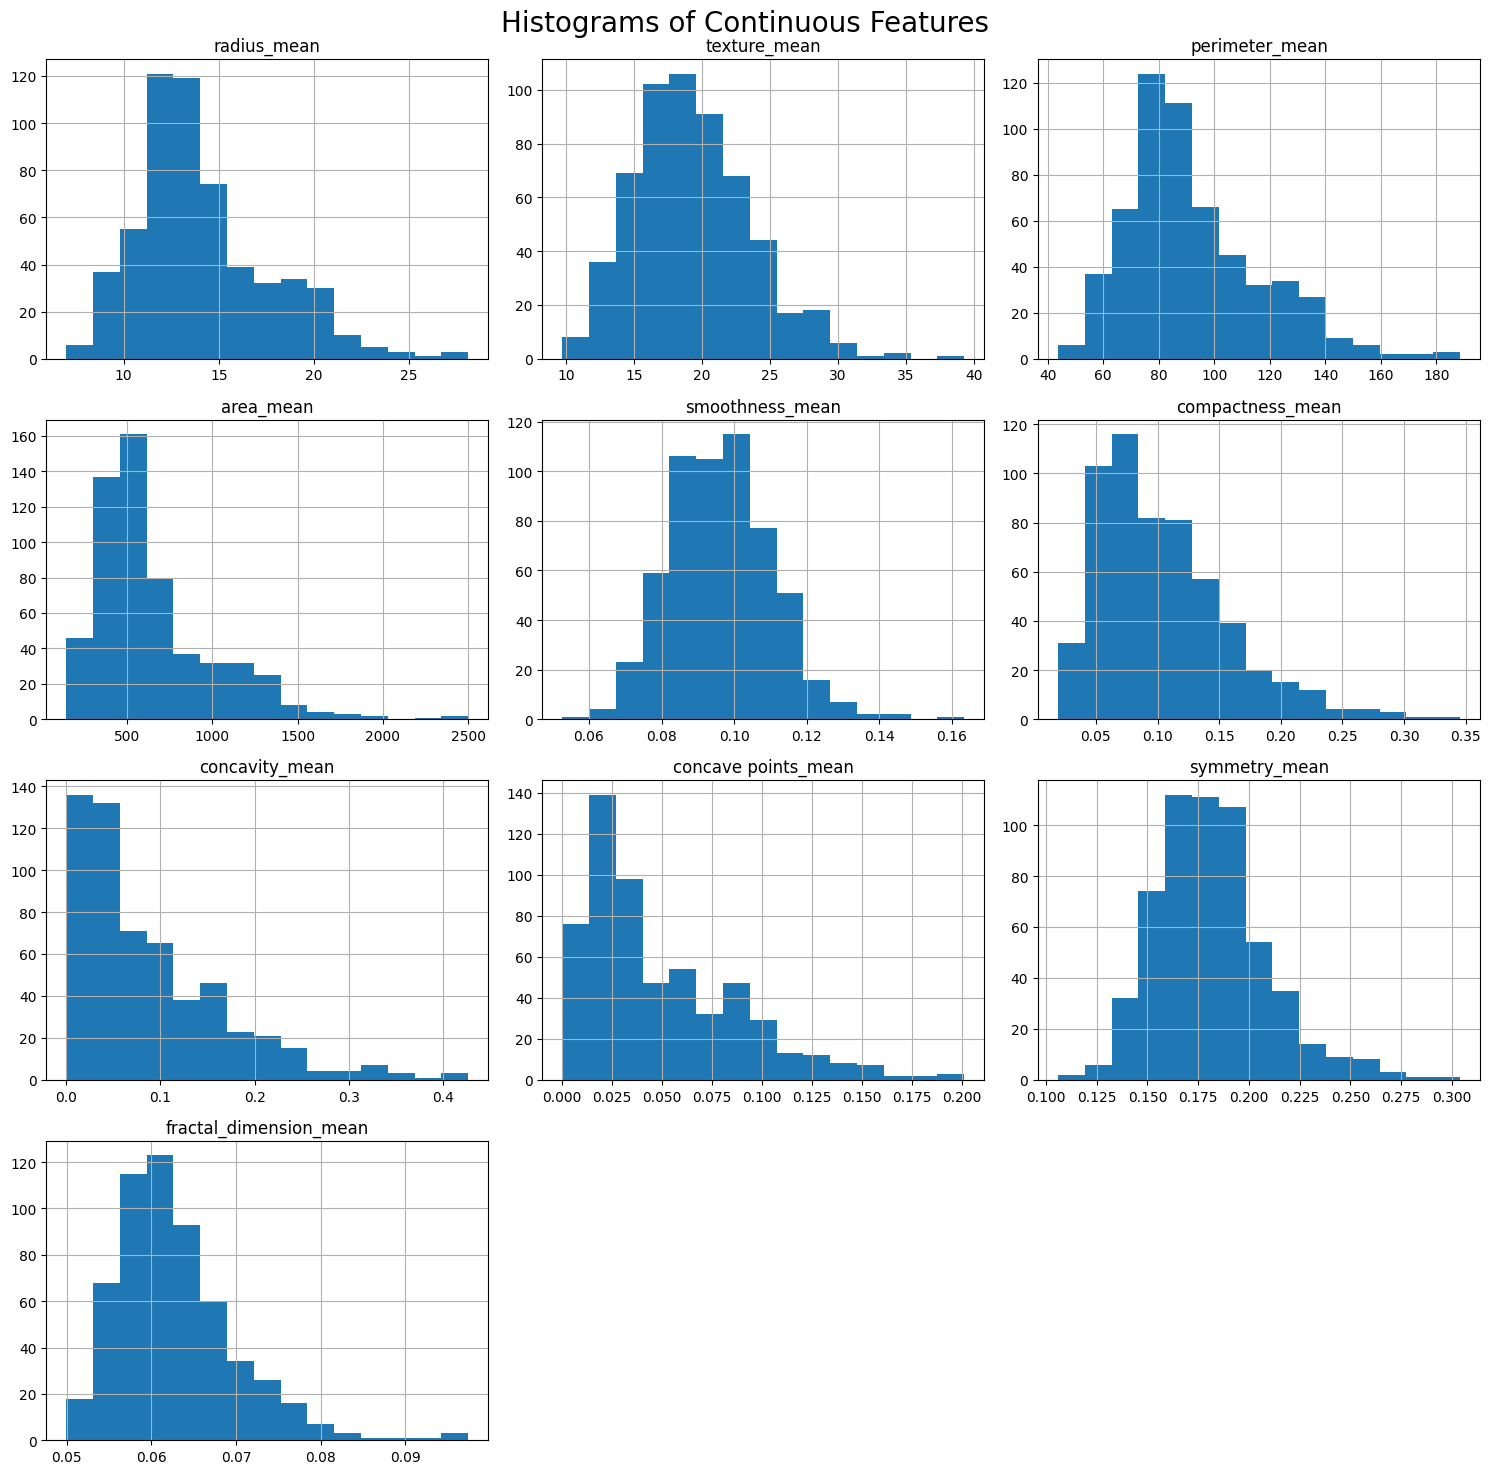

<ipython-input-11-525a9a1d857a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


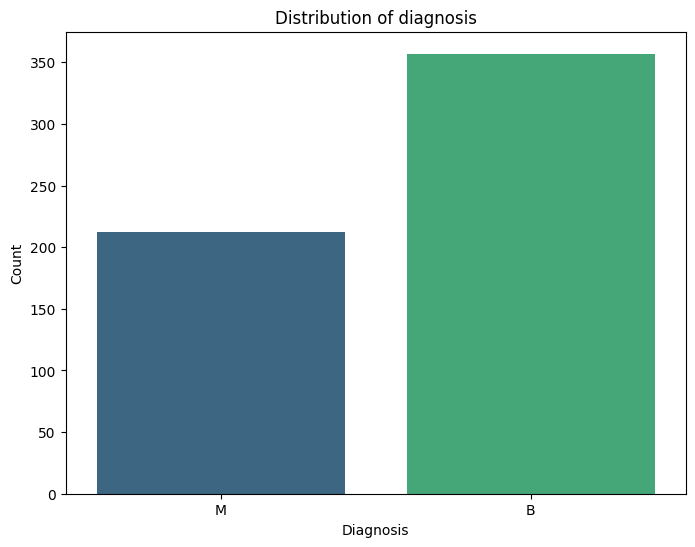

In [ ]:
categorical_features = ['diagnosis']

# Visualize distributions for continuous features
plt.figure(figsize=(15, 15))
data[continuous_features].hist(bins=15, figsize=(15, 15))
plt.suptitle("Histograms of Continuous Features", fontsize=20)
plt.tight_layout()
plt.show()

# Visualize categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

In [ ]:
data.duplicated().sum()

0

In [ ]:
for feature in data.columns:

    print({feature: data[feature].nunique()})

{'id': 569}
{'diagnosis': 2}
{'radius_mean': 456}
{'texture_mean': 479}
{'perimeter_mean': 522}
{'area_mean': 539}
{'smoothness_mean': 474}
{'compactness_mean': 537}
{'concavity_mean': 537}
{'concave points_mean': 542}
{'symmetry_mean': 432}
{'fractal_dimension_mean': 499}
{'radius_se': 540}
{'texture_se': 519}
{'perimeter_se': 533}
{'area_se': 528}
{'smoothness_se': 547}
{'compactness_se': 541}
{'concavity_se': 533}
{'concave points_se': 507}
{'symmetry_se': 498}
{'fractal_dimension_se': 545}
{'radius_worst': 457}
{'texture_worst': 511}
{'perimeter_worst': 514}
{'area_worst': 544}
{'smoothness_worst': 411}
{'compactness_worst': 529}
{'concavity_worst': 539}
{'concave points_worst': 492}
{'symmetry_worst': 500}
{'fractal_dimension_worst': 535}
{'Unnamed: 32': 0}


# Data Cleaning

Drop the `Unnamed: 32` column and the `ID` column because it has no significance.

In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# EDA(Exploratory Data Analysis)

`Target feature distribution`

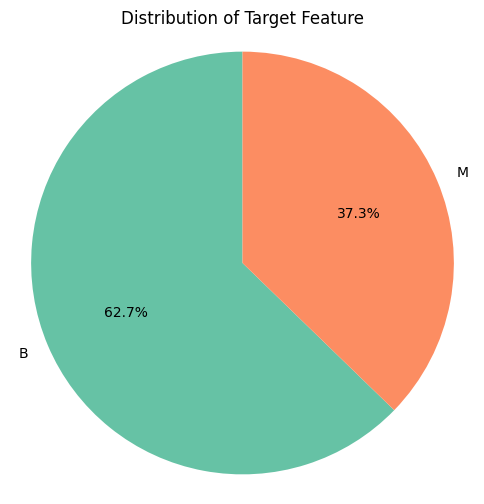

In [ ]:
Target = data['diagnosis'].value_counts()



plt.figure(figsize=(6, 6))

plt.pie(Target, labels=Target.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribution of Target Feature')

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.show()

`The target feature labels are imbalance`

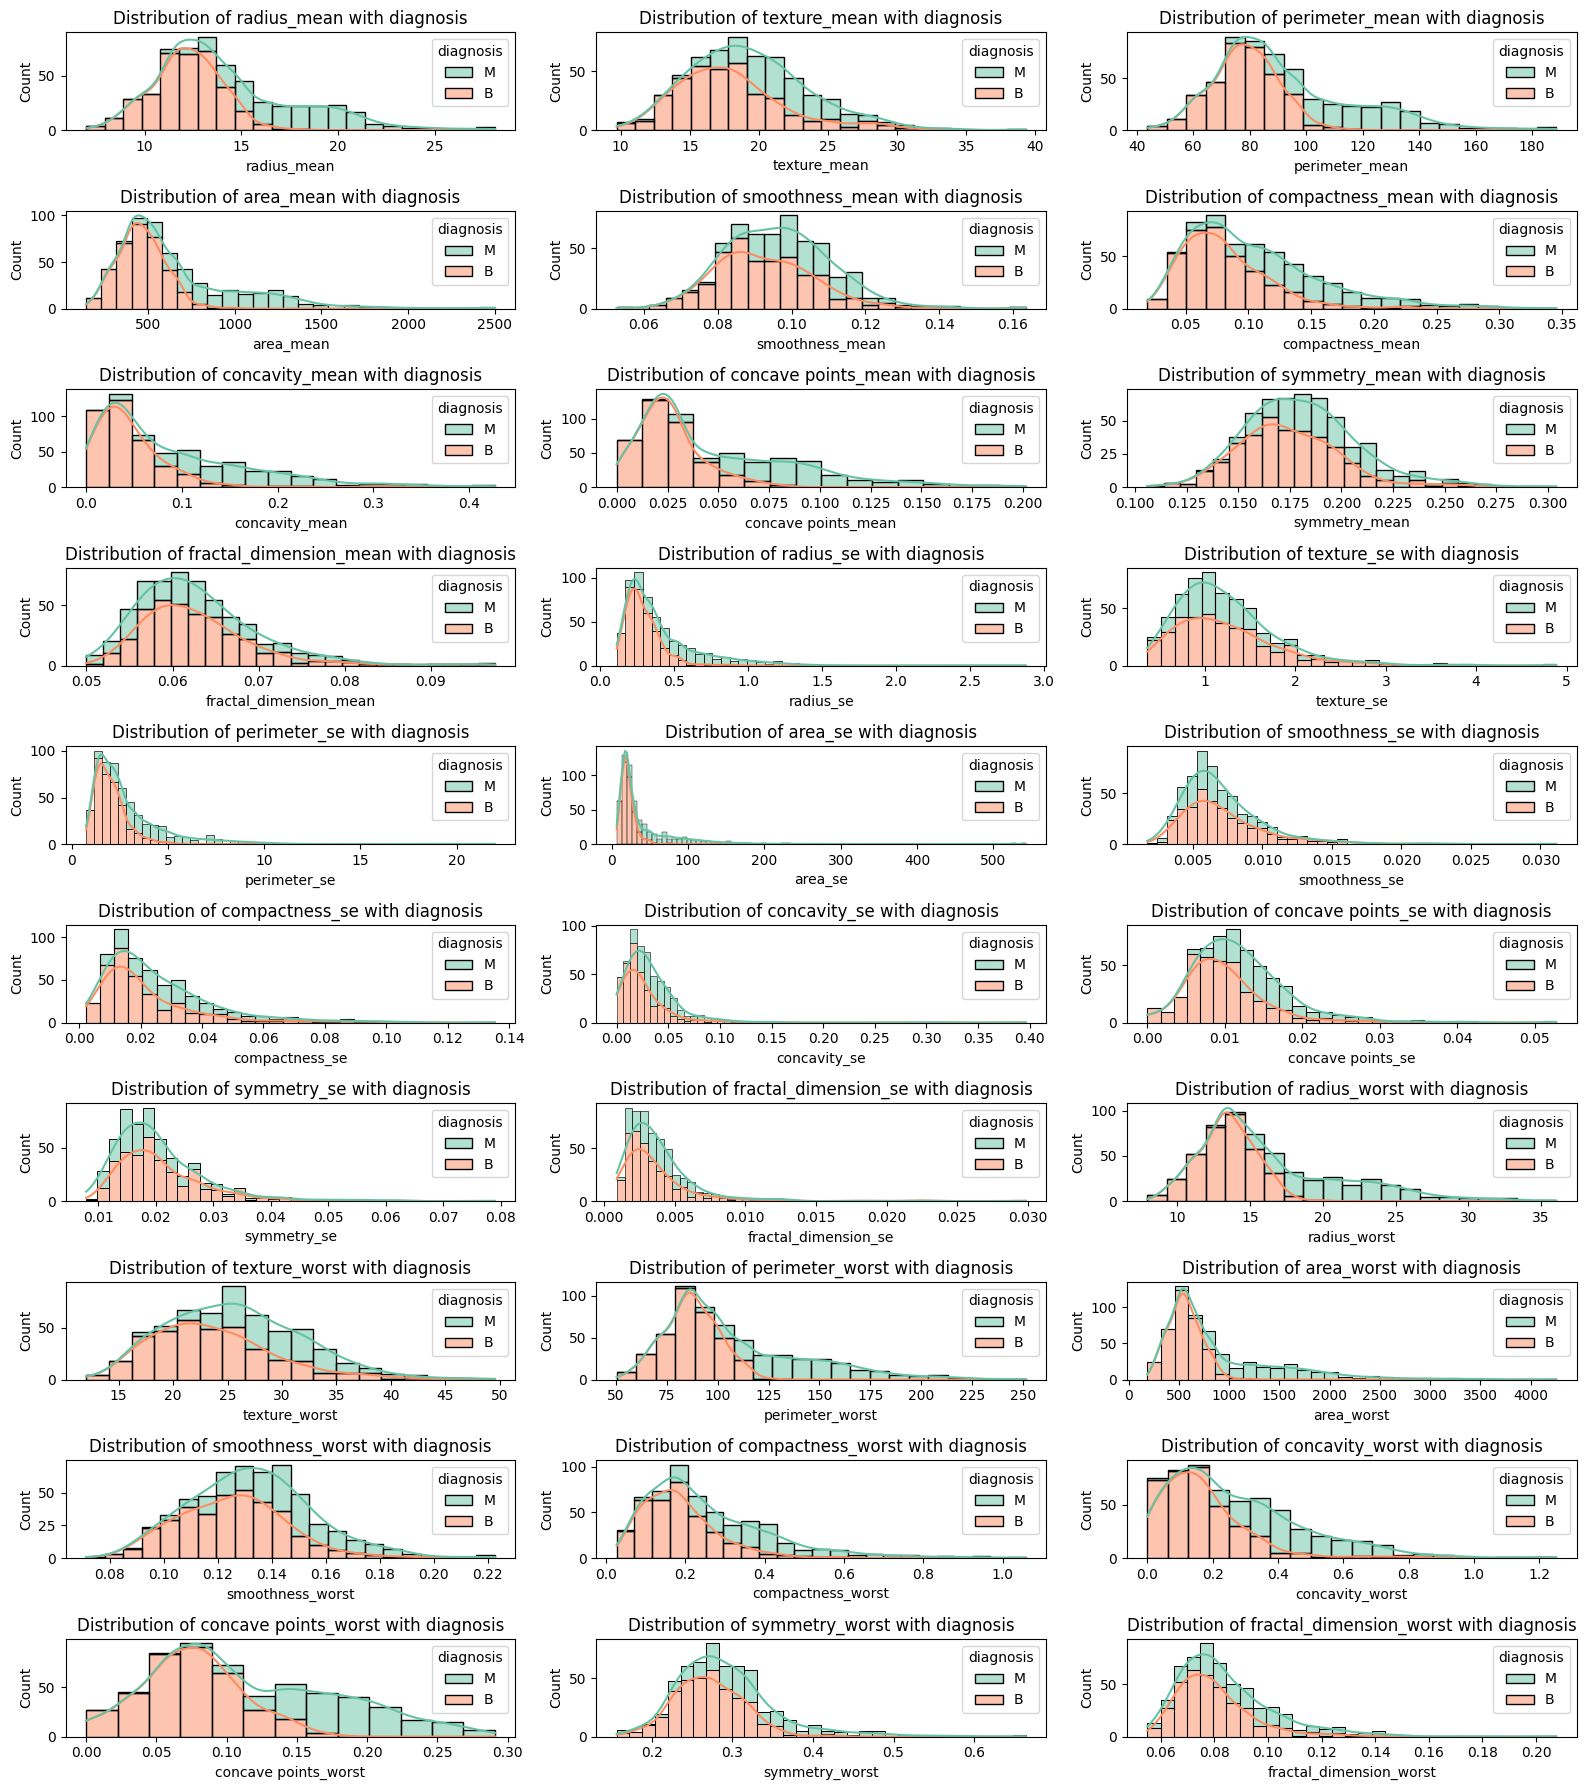

In [ ]:
hue = 'diagnosis'

plt.figure(figsize=(16, 18))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.histplot(data, x=col, hue=hue, palette="Set2", multiple="stack", kde=True)

    plt.title(f'Distribution of {col} with {hue}')

    plt.xlabel(col)

    plt.ylabel('Count')

plt.tight_layout()

plt.show()

`The data is skewed`

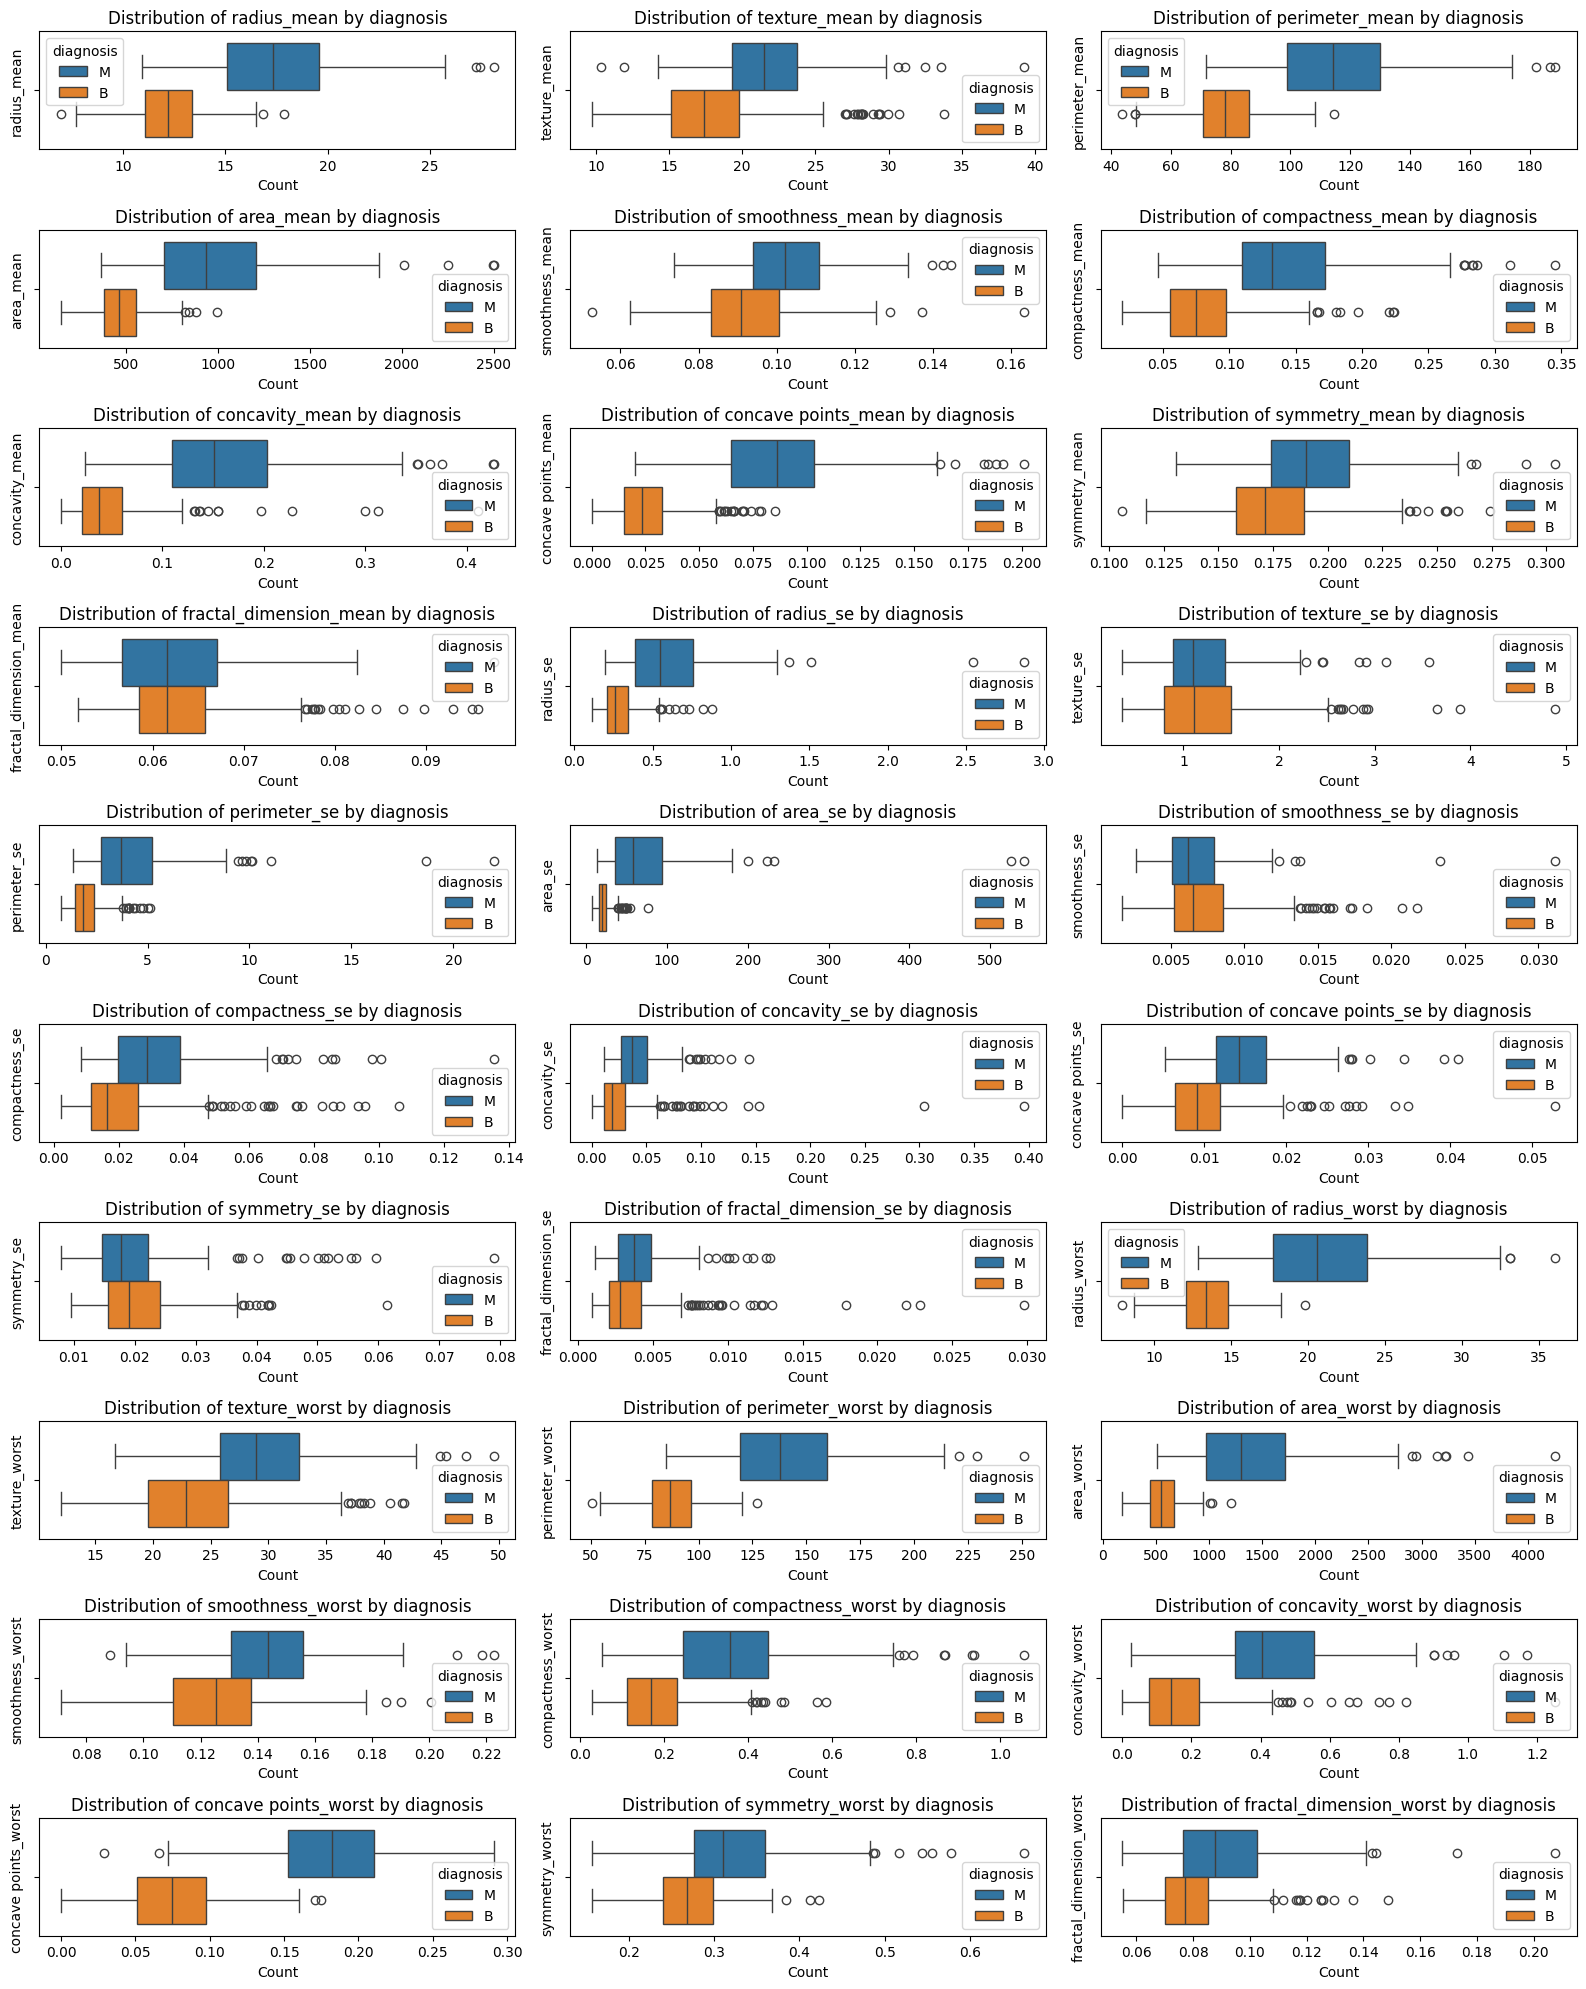

In [ ]:
hue = 'diagnosis'

plt.figure(figsize=(16, 20))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.boxplot(data, x=col, hue=hue)

    plt.title(f'Distribution of {col} by {hue}')

    plt.ylabel(col)

    plt.xlabel('Count')

plt.tight_layout()

plt.show()

`There are outliers.`

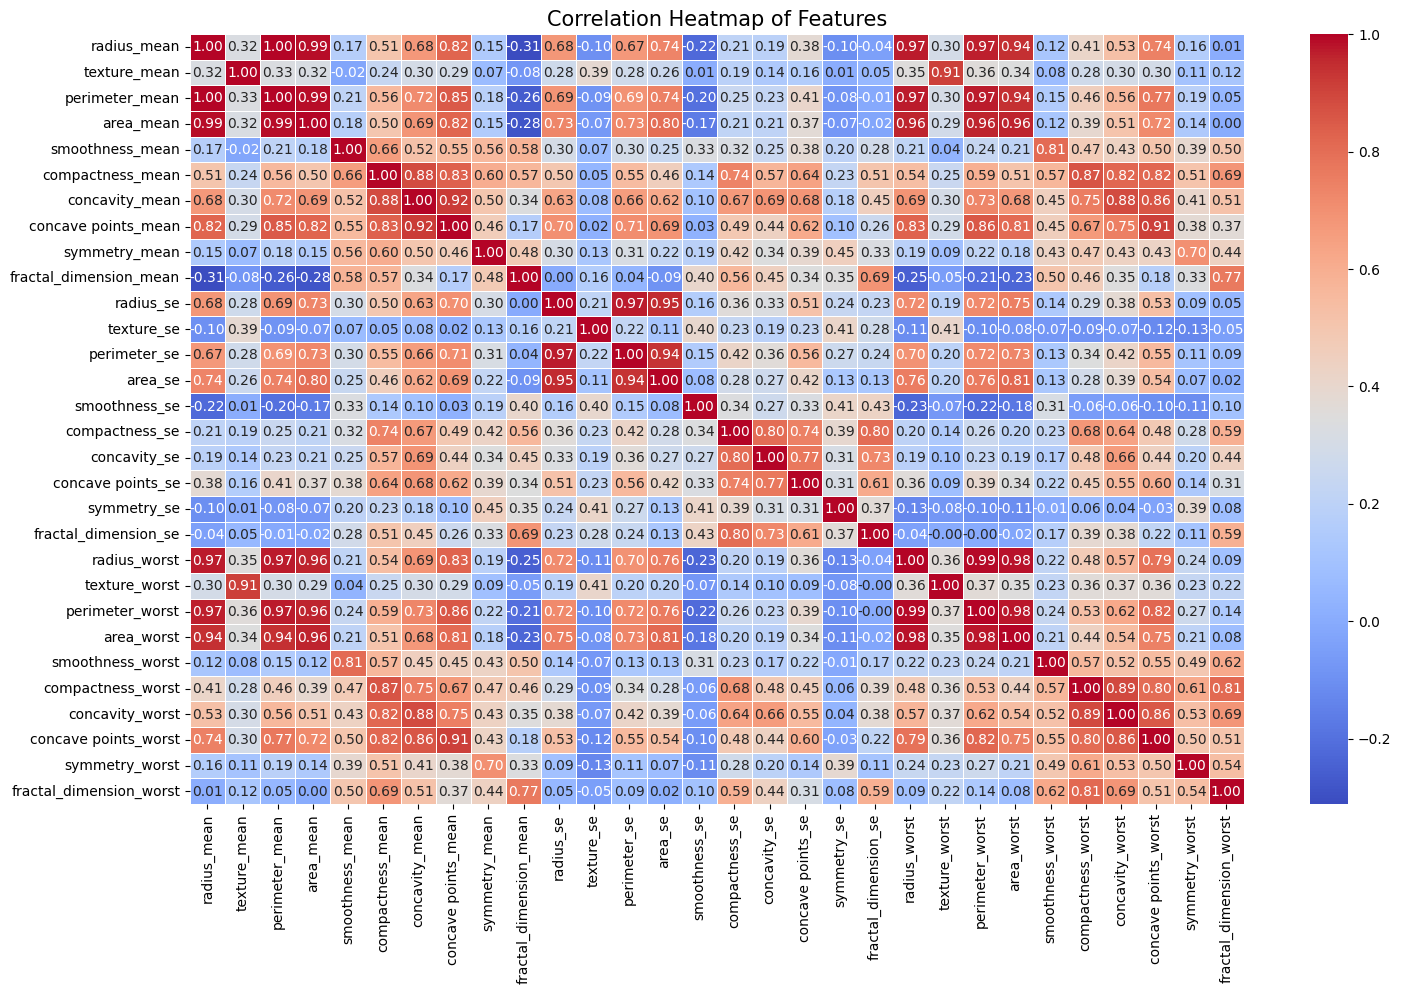

In [ ]:
corr_matrix = data.corr(numeric_only=True)



plt.figure(figsize=(17, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Features', size=15)

plt.show()

`There is very high multicollinearity.`

# Categorical Encoding

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M':1})

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


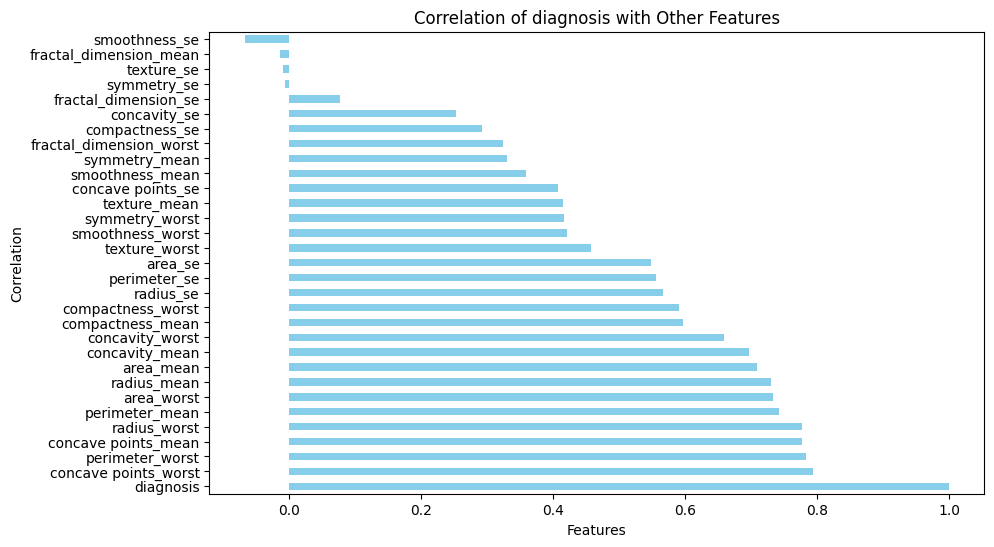

In [72]:
corr_vector = data.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)

corr_vector.plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.title(f'Correlation of diagnosis with Other Features')
plt.ylabel('Correlation')
plt.xlabel('Features')

plt.show()

Removing y's null value:

In [ ]:
# Check for NaN values in the target column
print("Number of missing values in y:", y.isna().sum())

Number of missing values in y: 569


In [ ]:
# Drop rows with NaN values in y
data = data.dropna(subset=['diagnosis'])

# Update x and y after dropping NaN values
x = data.drop('diagnosis', axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert target to binary

#Handling missing values

In [79]:
# Fill missing values for continuous features using median
for col in continuous_features:
    data[col] = data[col].fillna(data[col].median())

# Fill missing values for categorical features using mode
for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Data Splitting

In [80]:
x = data.drop('diagnosis', axis=1)

y = data['diagnosis']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

In [82]:
x_train.shape, x_test.shape

((483, 30), (86, 30))

# Data Transformation

In [83]:
scaler = StandardScaler()

x_train = pd.DataFrame(data=scaler.fit_transform(x_train), columns=x.columns)

x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x.columns)

# Modeling and Training

## Base Model (LogisticRegression)

In [84]:
LR = LogisticRegression(random_state=42)

In [85]:
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

train accuracy: 0.989648033126294
train f1_score: 0.9859154929577465


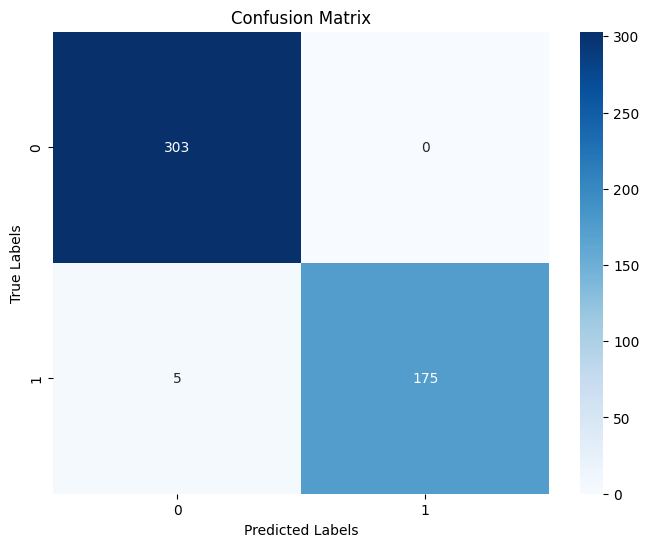

In [86]:
y_pred_train = LR.predict(x_train)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')

print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))

train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

test accuracy: 0.9883720930232558
test f1_score: 0.9841269841269841


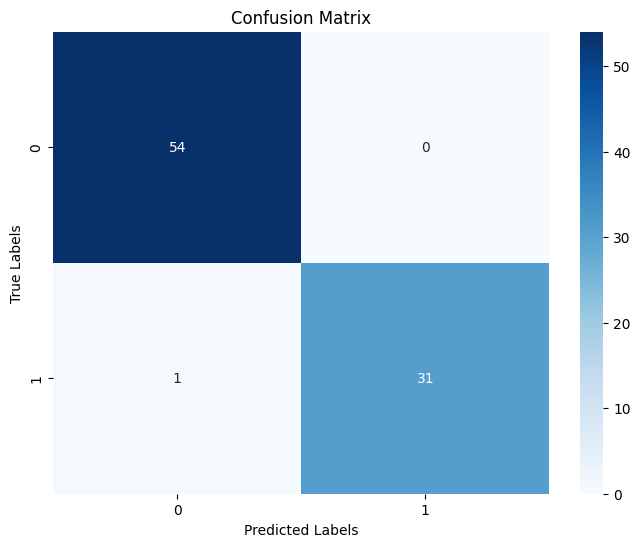

In [87]:
y_pred_test = LR.predict(x_test)

test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')

print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))
test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(test_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## DecisionTree

In [88]:
DT = DecisionTreeClassifier(max_depth=5, random_state=42)

In [89]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

train accuracy: 0.9813664596273292
train f1_score: 0.9745042492917847


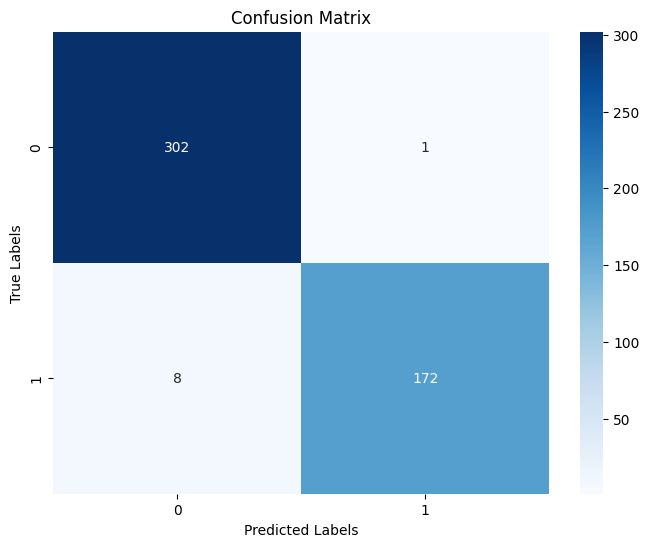

In [90]:
y_pred_train = DT.predict(x_train)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')

print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))

train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
plt.figure(figsize=(8, 6))  # Set the figure size

sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

test accuracy: 0.9651162790697675
test f1_score: 0.9523809523809523


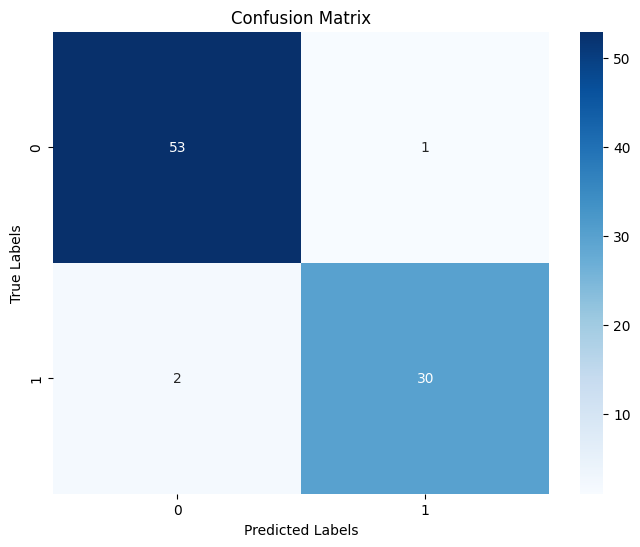

In [91]:
y_pred_test = DT.predict(x_test)

test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')

print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))
test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(test_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

## RandomForest

In [92]:
RF = RandomForestClassifier(n_estimators=150, max_depth=7)

In [93]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=150)

train accuracy: 0.9979296066252588
train f1_score: 0.9972144846796658


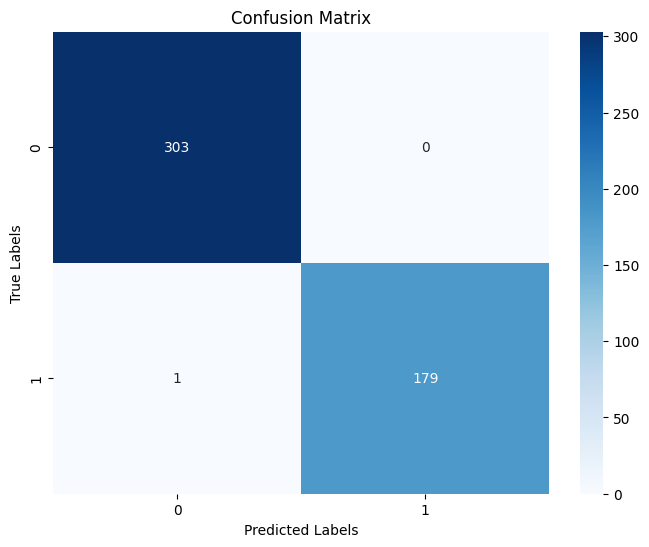

In [94]:
y_pred_train = RF.predict(x_train)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')

print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))
train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()

test accuracy: 0.9883720930232558
test f1_score: 0.9841269841269841


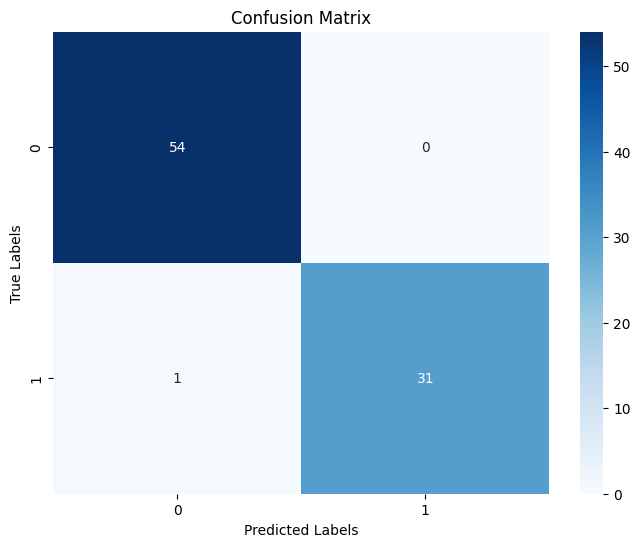

In [95]:
y_pred_test = RF.predict(x_test)

test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')

print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))

test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
plt.figure(figsize=(8, 6))  # Set the figure size

sns.heatmap(test_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

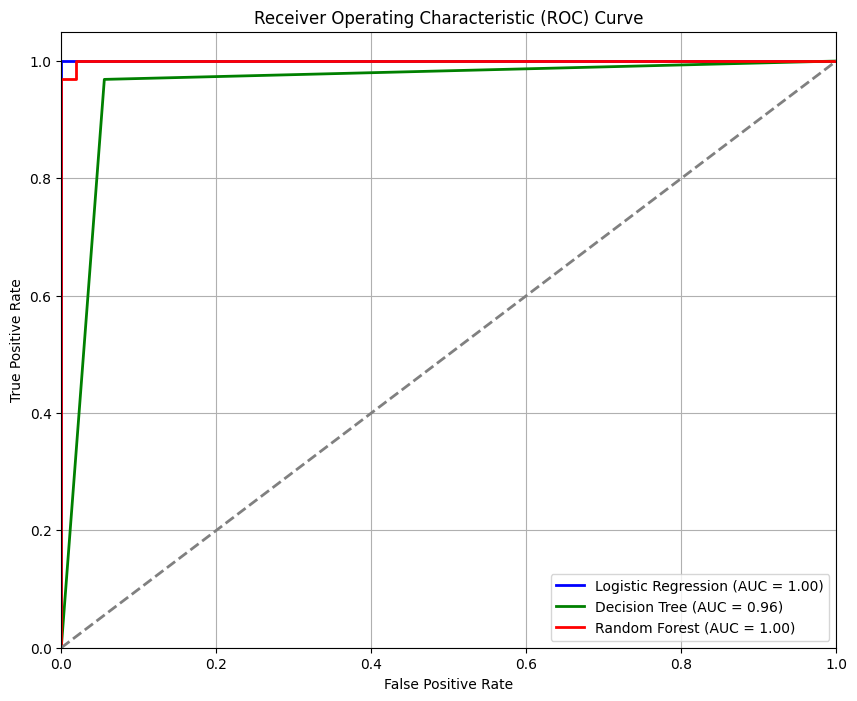

In [96]:
# Initialize classifiers
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the models
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Get predictions and probabilities for ROC curve
lr_prob = lr.predict_proba(x_test)[:, 1]
dt_prob = dt.predict_proba(x_test)[:, 1]
rf_prob = rf.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for each classifier
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Add diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Conclusion



1. After analyzing the dataset, we found that it is imbalanced. Therefore, in the evaluation step, we focused on the **F1 score** rather than accuracy.



2. The data distribution showed some skewness and outliers, so I applied a **Standard Scaler** to address these issues.



3. In the modeling step, I tested four models:

   - As a **baseline model**, I used **Logistic Regression**, which achieved an F1 score of **98** on the training set and **98** on the test set.

   - The second model was a **Decision Tree**, but the baseline Logistic Regression model performed better.

   - The third and final model was **Random Forest**, which achieved an F1 score of **99** on the training set and **98** on the test set, making it the best-performing model overall.